In [1]:
import matplotlib.pyplot as plt
from seaborn import heatmap
from seaborn import pairplot
from besos import eppy_funcs as ef
from besos import sampling
from besos.evaluator import EvaluatorEP
from besos.parameters import RangeParameter, FieldSelector, FilterSelector, Parameter, expand_plist, wwr, CategoryParameter, GenericSelector
from besos.problem import EPProblem
import pandas as pd
import numpy as np
import copy
import os
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

#### loading Besos results to make plot

In [2]:
results = pd.read_excel('/home/ict4bd/Downloads/NA/Output/OutputBesosResults.xlsx')
results['TotalConsumption'] = results['TotalConsumption']/375.335 #total area = 375.335
results

,Unnamed: 0,index,Window to Wall Ratio,Insulation Thickness,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility,InteriorLights:Electricity,Ventilation,TotalConsumption
0,0,0,0.1,0.0001,35522.01,43280.32,3541.09,22099.28,off,124.745654
1,1,1,0.2,0.0001,35093.05,43883.33,3469.42,21670.32,off,126.161296
2,2,2,0.3,0.0001,34679.90,44443.86,3401.28,21257.17,off,127.473191
3,3,3,0.4,0.0001,34267.12,44997.90,3336.59,20844.39,off,128.776933
4,4,4,0.5,0.0001,33867.00,45529.86,3275.18,20444.27,off,130.030613
5,5,5,0.6,0.0001,33450.11,46076.05,3213.87,20027.38,off,131.322472
6,6,6,0.7,0.0001,33064.44,46580.28,3157.60,19641.72,off,132.515966
7,7,7,0.8,0.0001,32617.05,47160.61,3096.45,19194.32,off,133.899210
8,8,8,0.9,0.0001,32262.65,47630.63,3050.00,18839.92,off,135.027722
9,9,9,0.1,0.0500,35522.01,28091.44,3590.94,22099.28,off,84.410966


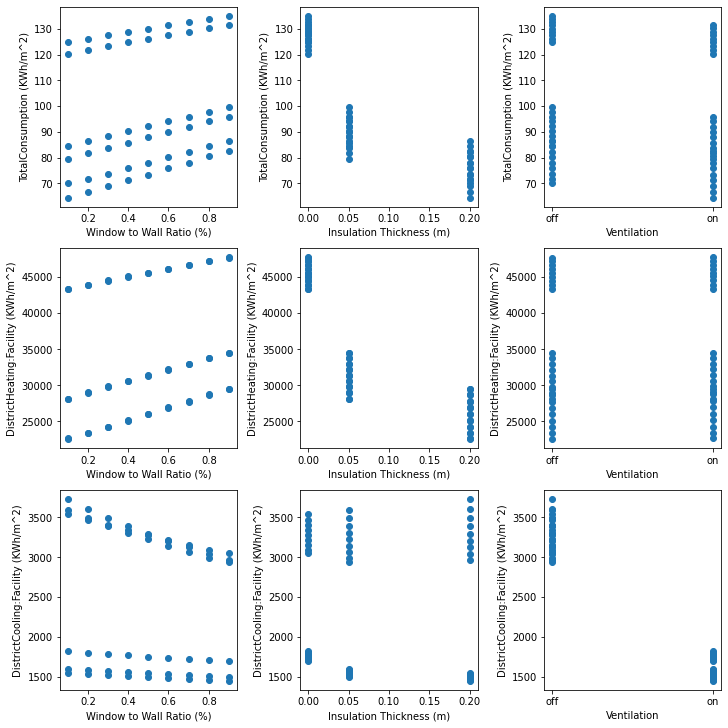

In [3]:
results_copy = copy.deepcopy(results)
y_axis = results_copy[['TotalConsumption', 'DistrictHeating:Facility', 'DistrictCooling:Facility']]
x_axis = results.drop(columns=['Unnamed: 0','DistrictHeating:Facility', 'DistrictCooling:Facility','TotalConsumption','Electricity:Facility','index','InteriorLights:Electricity'])
fig, ax = plt.subplots(len(x_axis.columns), len(y_axis.columns),figsize=(10, 10),constrained_layout=True)

for i in range(len(y_axis.columns)): 
    for j in range(len(x_axis.columns)):
        ax[i,j].scatter(x_axis[x_axis.columns[j]],y_axis[y_axis.columns[i]])
        if x_axis.columns[j] == "Window to Wall Ratio":
            x_label = x_axis.columns[j] + (" (%)")
        elif x_axis.columns[j] == "Insulation Thickness":
            x_label = x_axis.columns[j] + (" (m)")
        else:
            x_label = x_axis.columns[j]
        ax[i,j].set_xlabel(x_label)
        y_label = y_axis.columns[i] +" (KWh/m^2)"
        ax[i,j].set_ylabel(y_label)              

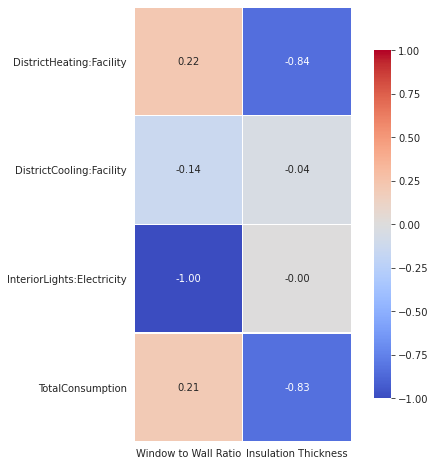

In [7]:
fig=plt.figure(figsize=(8, 8))
results2 = results.drop(columns=['index'])

temp = results2.corr()
temp = temp.drop(columns=['Unnamed: 0','DistrictCooling:Facility','DistrictHeating:Facility','Electricity:Facility','InteriorLights:Electricity','TotalConsumption'])

temp = temp.drop(['Unnamed: 0','Insulation Thickness', 'Window to Wall Ratio','Electricity:Facility'])

cmap = LinearSegmentedColormap.from_list(
    name='hm',
    colors=['lightgreen','white','salmon']
)
mask = np.zeros_like(temp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(
        temp, 
        annot=True, 
        fmt='.2f', 
        cmap='coolwarm',
        #cmap = cmap,
        square=True, 
        linewidths=.5, 
        annot_kws={"size": 10}, 
        cbar_kws={"shrink": .8},
        vmin=-1,
        vmax=1
    )
#     ax.set_ylim(4, 0, .5)
    plt.yticks(rotation=0) 
#     plt.savefig('../fig/heatmap.png', transparent=True)